#About Dataset

This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow import keras



In [3]:
#Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/KodandRam/TMNIST_dataset/main/TMNIST_Data.csv')
df.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Literata-Italic[opsz,wght]",4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chathura-Ligh,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AveriaLibre-LightItalic,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Oxygen-Ligh,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,IBMPlexSans-MediumItalic,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Understanding the data

In [4]:
rows=df.shape[0]
rows

29900

In [5]:
columns=df.shape[1]
columns

786

In [6]:
print(df['labels'].unique())
print(df['labels'].nunique())

[2 8 4 3 1 6 5 9 7 0]
10


There are 10 labels that are ranging from 0 to 9

#Preprocessing the data

In [7]:
# Remove font name
data = df.iloc[:, 1:]

# Split data into features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [8]:
X=X.astype('float32')/255.0

X.astype('float32') converts the data type of the X array from integer to float32.

Divides each pixel value in the X array by 255.0 to scale the pixel values between 0 and 1.

The resulting X array has all the pixel values normalized to the range between 0 and 1.

In [9]:
y

0        2
1        8
2        4
3        3
4        1
        ..
29895    7
29896    5
29897    0
29898    1
29899    6
Name: labels, Length: 29900, dtype: int64

Splitting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

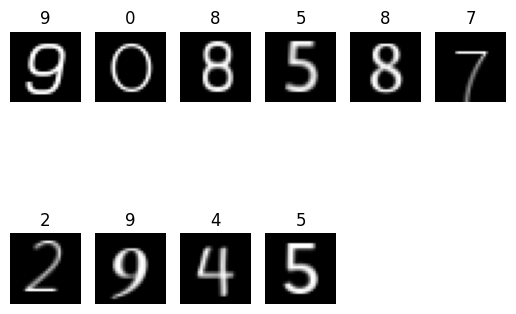

In [11]:
# Reshape a row of the data into a 28x28 image
for i in range(10):
    sample_image = X_train.iloc[i].values.reshape(28, 28)
    plt.subplot(2, 6, i+1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(y_train.iloc[i])  # Update to use the y variable for class labels
    plt.axis('off')
    
plt.show()

In [14]:
y_train = keras.utils.to_categorical(y_train.values, 10)
y_test = keras.utils.to_categorical(y_test.values, 10)

The 'to_categorical' function from Keras is used to convert the target variable into a one-hot encoded format.



In [15]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

By reshaping the arrays in this way, we are converting the image data from a 1D array of pixel values to a 3D array of pixel values arranged in a grid, with a channel dimension added.

#Modeling Neural Network

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



# Compile the model


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model


In [18]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
748/748 [==============================] - 42s 53ms/step - loss: 0.1906 - accuracy: 0.9411 - val_loss: 0.0536 - val_accuracy: 0.9866
Epoch 2/5
748/748 [==============================] - 33s 44ms/step - loss: 0.0516 - accuracy: 0.9851 - val_loss: 0.0574 - val_accuracy: 0.9831
Epoch 3/5
748/748 [==============================] - 33s 44ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 4/5
748/748 [==============================] - 34s 45ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0328 - val_accuracy: 0.9933
Epoch 5/5
748/748 [==============================] - 33s 44ms/step - loss: 0.0230 - accuracy: 0.9932 - val_loss: 0.0400 - val_accuracy: 0.9908


# Evaluate the model


In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


187/187 [==============================] - 2s 11ms/step - loss: 0.0400 - accuracy: 0.9908
Test accuracy: 0.9908027052879333


# Generate predictions


In [22]:
y_pred = model.predict(X_test)

187/187 [==============================] - 2s 11ms/step


# Convert predictions from one-hot encoding to class labels


In [23]:
y_pred_labels = np.argmax(y_pred, axis=1)


# Print some predictions and their corresponding true labels


In [24]:
for i in range(10):
    print("Predicted label:", y_pred_labels[i])
    print("True label:", np.argmax(y_test[i]))

Predicted label: 3
True label: 3
Predicted label: 5
True label: 5
Predicted label: 8
True label: 8
Predicted label: 9
True label: 9
Predicted label: 0
True label: 0
Predicted label: 2
True label: 2
Predicted label: 5
True label: 5
Predicted label: 1
True label: 1
Predicted label: 7
True label: 7
Predicted label: 0
True label: 0


#Idea Behind

This neural network architecture is designed for image classification tasks, specifically for the MNIST dataset which consists of grayscale images of handwritten digits.

The first layer is a 2D convolutional layer with 32 filters of size 3x3 and ReLU activation function. This layer is used to extract features from the input image.

The second layer is a max pooling layer with a pool size of 2x2, which reduces the spatial size of the feature maps while retaining the important information.

The third and fourth layers are similar to the first two, but with 64 and 128 filters respectively. Additionally, a dropout layer with a rate of 0.2 is added after each of these convolutional layers to prevent overfitting.

The fifth layer is a flatten layer which flattens the output of the previous layer to a 1D array.

The sixth layer is a dense layer with 128 units and ReLU activation function, which performs further feature extraction and transformation.

Finally, the output layer is a dense layer with 10 units and a softmax activation function, which produces a probability distribution over the 10 possible classes (digits 0-9).

The model is trained using the Adam optimizer and the categorical cross-entropy loss function, and the accuracy is used as the evaluation metric. The training is performed for 5 epochs with a batch size of 32.

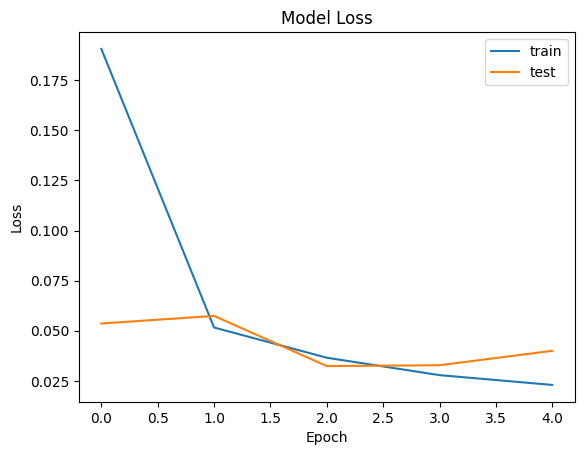

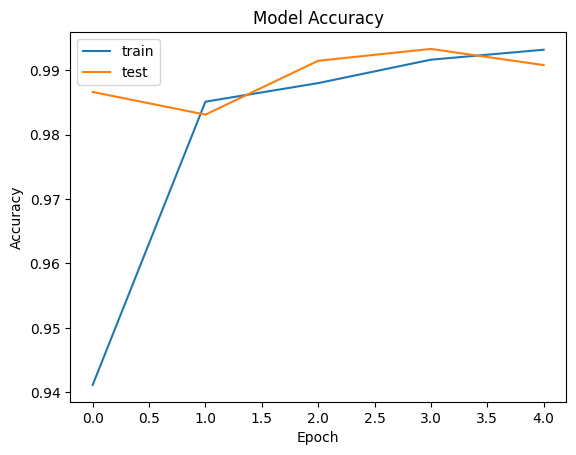

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The loss plot shows that the training and validation loss both decrease over the epochs, which indicates that the model is learning from the training data and is not overfitting on the test data.

The accuracy plot shows that the training accuracy increases over the epochs, indicating that the model is learning and improving its classification accuracy. The validation accuracy also increases and stays close to the training accuracy, which is a good sign that the model generalizes well to new data.

Overall, the loss and accuracy plots indicate that the model is performing well and is a good fit for the MNIST dataset.